In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('houseprice.csv',usecols=['2ndFlrSF','1stFlrSF','MSSubClass','MSZoning','LotFrontage','LotShape','LotArea','Street','YearBuilt','SalePrice']).dropna()
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [5]:
df.shape

(1201, 10)

In [6]:
for i in df.columns:
    print(i,df[i].nunique())

MSSubClass 15
MSZoning 5
LotFrontage 110
LotArea 869
Street 2
LotShape 4
YearBuilt 112
1stFlrSF 678
2ndFlrSF 368
SalePrice 597


In [7]:
import datetime
datetime.datetime.now().year

2024

In [8]:
df['Total_Years']=datetime.datetime.now().year-df['YearBuilt']
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice,Total_Years
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500,21
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500,48
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500,23
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000,109
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000,24


In [9]:
df.drop('YearBuilt',axis=1,inplace=True)

In [10]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total_Years'],
      dtype='object')

In [11]:
df.dtypes

,0
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
LotShape,object
1stFlrSF,int64
2ndFlrSF,int64
SalePrice,int64
Total_Years,int64


In [12]:
categorical_features=["MSSubClass","MSZoning","LotShape","Street"]
out_feature="SalePrice"

In [13]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders["MSSubClass"]=LabelEncoder()
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0])

In [14]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

In [15]:
lbl_encoders={}
for feature in categorical_features:
    lbl_encoders[feature]=LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [16]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total_Years
0,5,3,65.0,8450,1,3,856,854,208500,21
1,0,3,80.0,9600,1,3,1262,0,181500,48
2,5,3,68.0,11250,1,0,920,866,223500,23
3,6,3,60.0,9550,1,0,961,756,140000,109
4,5,3,84.0,14260,1,0,1145,1053,250000,24
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,25
1456,0,3,85.0,13175,1,3,2073,0,210000,46
1457,6,3,66.0,9042,1,3,1188,1152,266500,83
1458,0,3,68.0,9717,1,3,1078,0,142125,74


In [17]:
import numpy as np

In [18]:
categorical_features=np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
categorical_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [19]:
import torch
categorical_features=torch.tensor(categorical_features,dtype=torch.int64)
categorical_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [20]:
continuous_features=[]
for i in df.columns:
    if i in ["MSSubClass","MSZoning","Street","LotShape","SalePrice"]:
        pass
    else:
        continuous_features.append(i)

In [21]:
continuous_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total_Years']

In [22]:
continuous_features=np.stack([df[i].values for i in continuous_features],axis=1)
continuous_features=torch.tensor(continuous_features,dtype=torch.float)
continuous_features

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [23]:
continuous_features.dtype

torch.float32

In [24]:
y=torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int64  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int64  
 5   LotShape     1201 non-null   int64  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total_Years  1201 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 103.2 KB


In [26]:
categorical_features.shape,continuous_features.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [27]:
len(df['MSSubClass'].unique())

15

In [28]:
categorical_dims=[len(df[col].unique()) for col in ["MSSubClass","MSZoning","Street","LotShape"]]
categorical_dims

[15, 5, 2, 4]

In [29]:
embedding_dim= [(x, min(50, (x + 1) // 2)) for x in categorical_dims]
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [30]:
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [31]:
categorical_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [32]:
pd.set_option('display.max_rows',500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(categorical_features[:,i]))

In [33]:
embedding_val

[tensor([[-0.0971, -0.6068, -0.9792,  ...,  0.9378, -0.9912, -0.8211],
         [ 1.3334, -0.4763, -0.4627,  ..., -1.2712, -1.1640, -1.3091],
         [-0.0971, -0.6068, -0.9792,  ...,  0.9378, -0.9912, -0.8211],
         ...,
         [-0.5048, -0.4142, -1.0793,  ...,  0.6795,  1.6693,  0.2694],
         [ 1.3334, -0.4763, -0.4627,  ..., -1.2712, -1.1640, -1.3091],
         [ 1.3334, -0.4763, -0.4627,  ..., -1.2712, -1.1640, -1.3091]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.0684,  0.2933, -0.8837],
         [ 0.0684,  0.2933, -0.8837],
         [ 0.0684,  0.2933, -0.8837],
         ...,
         [ 0.0684,  0.2933, -0.8837],
         [ 0.0684,  0.2933, -0.8837],
         [ 0.0684,  0.2933, -0.8837]], grad_fn=<EmbeddingBackward0>),
 tensor([[0.9334],
         [0.9334],
         [0.9334],
         ...,
         [0.9334],
         [0.9334],
         [0.9334]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.9806,  0.7777],
         [-0.9806,  0.7777],
         [ 2.2798, -0.2202],

In [34]:
z=torch.cat(embedding_val,1)
z

tensor([[-0.0971, -0.6068, -0.9792,  ...,  0.9334, -0.9806,  0.7777],
        [ 1.3334, -0.4763, -0.4627,  ...,  0.9334, -0.9806,  0.7777],
        [-0.0971, -0.6068, -0.9792,  ...,  0.9334,  2.2798, -0.2202],
        ...,
        [-0.5048, -0.4142, -1.0793,  ...,  0.9334, -0.9806,  0.7777],
        [ 1.3334, -0.4763, -0.4627,  ...,  0.9334, -0.9806,  0.7777],
        [ 1.3334, -0.4763, -0.4627,  ...,  0.9334, -0.9806,  0.7777]],
       grad_fn=<CatBackward0>)

In [35]:
dropout=nn.Dropout(0.4)

In [36]:
final_embed=dropout(z)
final_embed

tensor([[-0.1619, -0.0000, -1.6321,  ...,  0.0000, -1.6343,  0.0000],
        [ 0.0000, -0.7939, -0.7712,  ...,  0.0000, -1.6343,  0.0000],
        [-0.0000, -1.0113, -1.6321,  ...,  0.0000,  0.0000, -0.0000],
        ...,
        [-0.0000, -0.6903, -1.7988,  ...,  1.5556, -0.0000,  1.2961],
        [ 0.0000, -0.0000, -0.0000,  ...,  1.5556, -1.6343,  0.0000],
        [ 2.2223, -0.0000, -0.0000,  ...,  1.5556, -1.6343,  1.2961]],
       grad_fn=<MulBackward0>)

In [57]:
class FeedForwardNN(nn.Module):
    def __init__(self,embedding_dim,n_cont,out_sz,layers,p=0.5):
        super().__init__()
        self.embeds=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop=nn.Dropout(p)
        self.bn_cont=nn.BatchNorm1d(5)

        layerlist=[]
        n_emb=sum((out_f for x,out_f in embedding_dim))
        n_in=n_emb+n_cont

        self.layers = nn.Sequential(
            nn.Linear(19, 100),  # Updated input size from 1215 to 19
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(100),
            nn.Dropout(0.4),
            nn.Linear(100, 50),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(50),
            nn.Dropout(0.4),
            nn.Linear(50, 1)
        )


    def forward(self,x_cat,x_cont):
        embeddings=[]
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x=torch.cat(embeddings,1)
        x=self.emb_drop(x)
        x_cont=self.bn_cont(x_cont)
        x=torch.cat([x,x_cont],1)
        x=self.layers(x)
        return x


In [58]:
torch.manual_seed(1000)
model=FeedForwardNN(embedding_dim,len(continuous_features),1,[100,50],p=0.4)

In [59]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [60]:
for layer in model.children():
    if isinstance(layer, torch.nn.BatchNorm1d) or isinstance(layer, torch.nn.BatchNorm2d):
        print(layer)
        print(f"Num features in BatchNorm: {layer.num_features}")


BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
Num features in BatchNorm: 5


In [61]:
continuous_features.shape

torch.Size([1201, 5])

In [62]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [63]:
batch_size=1200
test_size=int(batch_size*0.15)

train_categorical=categorical_features[:batch_size-test_size]
test_categorical=categorical_features[batch_size-test_size:batch_size]

train_numerical=continuous_features[:batch_size-test_size]
test_numerical=continuous_features[batch_size-test_size:batch_size]

y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [64]:
len(train_categorical),len(test_categorical),len(train_numerical),len(test_numerical),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [65]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_numerical)

    loss=torch.sqrt(loss_function(y_pred,y_train))
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 200496.640625
Epoch number: 11 and the loss : 200493.34375
Epoch number: 21 and the loss : 200489.109375
Epoch number: 31 and the loss : 200482.453125
Epoch number: 41 and the loss : 200473.546875
Epoch number: 51 and the loss : 200461.828125
Epoch number: 61 and the loss : 200447.421875
Epoch number: 71 and the loss : 200429.390625
Epoch number: 81 and the loss : 200408.015625
Epoch number: 91 and the loss : 200383.6875
Epoch number: 101 and the loss : 200357.671875
Epoch number: 111 and the loss : 200321.28125
Epoch number: 121 and the loss : 200290.875
Epoch number: 131 and the loss : 200254.59375
Epoch number: 141 and the loss : 200210.109375
Epoch number: 151 and the loss : 200165.171875
Epoch number: 161 and the loss : 200115.328125
Epoch number: 171 and the loss : 200060.484375
Epoch number: 181 and the loss : 199999.515625
Epoch number: 191 and the loss : 199944.15625
Epoch number: 201 and the loss : 199880.171875
Epoch number: 211 and the loss : 

Text(0.5, 0, 'epoch')

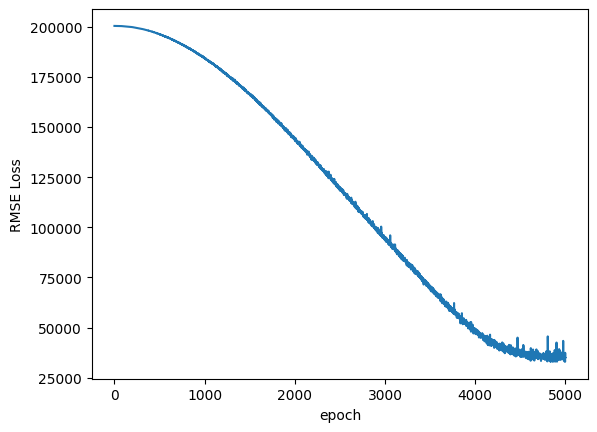

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
# Convert the list of tensors to a list of floats
final_losses = [loss.item() for loss in final_losses]
plt.plot(range(epochs),final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch')

In [68]:
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_numerical)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 44785.26953125


In [69]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [70]:
data_predicted

,Prediction
0,144831.062500
1,181808.468750
2,183470.375000
3,302817.218750
4,186678.781250
5,271029.375000
6,229252.171875
7,281366.906250
8,152616.562500
9,405056.968750


In [71]:
from typing import final
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,144831.06250,-14831.06250
1,138887.0,181808.46875,-42921.46875
2,175500.0,183470.37500,-7970.37500
3,195000.0,302817.21875,-107817.21875
4,142500.0,186678.78125,-44178.78125


In [72]:
torch.save(model,'houseprice.pt')

In [73]:
torch.save(model.state_dict(),'houseprice_params.pt')

In [74]:
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [75]:
model1.load_state_dict(torch.load('houseprice_params.pt'))

<ipython-input-75-722d7cb537da>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1.load_state_dict(torch.load('houseprice_params.pt'))


<All keys matched successfully>

In [76]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)